In [1]:
!pip install torch transformers requests huggingface_hub[hf_xet]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-10.3

In [2]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Загрузка модели и токенизатора
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base")

# Скачивание весов OpenAI
!wget https://openaipublic.azureedge.net/gpt-2/detector-models/v1/detector-base.pt -O detector.pt

# Загрузка state_dict с исправлением структуры
checkpoint = torch.load("detector.pt", map_location=torch.device("cpu"))
state_dict = checkpoint["model_state_dict"]  # Извлекаем только веса модели

# Загружаем веса в модель (игнорируем лишние ключи)
model.load_state_dict(state_dict, strict=False)  # strict=False пропускает отсутствующие ключи
model.eval()

2025-05-05 21:42:25.567806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746481345.766803      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746481345.820191      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--2025-05-05 21:42:42--  https://openaipublic.azureedge.net/gpt-2/detector-models/v1/detector-base.pt
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.246.41, 2620:1ec:bdf::41
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.246.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 501001061 (478M) [application/octet-stream]
Saving to: ‘detector.pt’

detector.pt         100%[===================>] 477.79M  56.1MB/s    in 9.9s    

2025-05-05 21:42:52 (48.4 MB/s) - ‘detector.pt’ saved [501001061/501001061]



/tmp/ipykernel_18/3185063907.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("detector.pt", map_location=torch.device("cpu"))


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [3]:
# Функция детектирования
def detect_gpt2_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    proba = torch.softmax(outputs.logits, dim=1)
    return proba[0][1].item()

# Тест
text = "In a shocking finding, scientists discovered a herd of unicorns."
print(f"Вероятность GPT-2: {detect_gpt2_text(text):.2%}")

Вероятность GPT-2: 35.75%


In [4]:
import os
import json
import pandas as pd
import requests
from tqdm import tqdm

# Создаем папку для датасета
os.makedirs('gpt2_dataset', exist_ok=True)
os.chdir('gpt2_dataset')

human_url = 'https://openaipublic.azureedge.net/gpt-2/output-dataset/v1/webtext.train.jsonl'
gpt2_url = 'https://openaipublic.azureedge.net/gpt-2/output-dataset/v1/small-117M.train.jsonl'

def download_file(url, filename):
    response = requests.get(url, stream=True)
    response.raise_for_status()

    total_size = int(response.headers.get('content-length', 0))
    block_size = 1024

    with open(filename, 'wb') as f, tqdm(
        desc=filename,
        total=total_size,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(block_size):
            bar.update(len(data))
            f.write(data)

print("Скачивание human texts...")
download_file(human_url, 'webtext.train.jsonl')

print("\nСкачивание GPT-2 texts...")
download_file(gpt2_url, 'gpt-2.train.jsonl')

print("\nЗагрузка завершена!")

Скачивание human texts...


webtext.train.jsonl: 100%|██████████| 648M/648M [00:10<00:00, 66.9MiB/s]



Скачивание GPT-2 texts...


gpt-2.train.jsonl: 100%|██████████| 740M/740M [00:11<00:00, 65.7MiB/s]


Загрузка завершена!


In [5]:
# Функция для чтения больших .jsonl файлов
def load_jsonl(file_path, max_samples=50000):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= max_samples:
                break
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                continue
    return data

# Загружаем данные (ограничиваем количество образцов для экономии памяти)
print("Загрузка human texts...")
human_data = load_jsonl('webtext.train.jsonl')

print("Загрузка GPT-2 texts...")
gpt2_data = load_jsonl('gpt-2.train.jsonl')

# Создаем DataFrame
df_human = pd.DataFrame({
    'text': [item['text'] for item in human_data],
    'label': 0  # 0 = человеческий текст
})

df_gpt2 = pd.DataFrame({
    'text': [item['text'] for item in gpt2_data],
    'label': 1  # 1 = GPT-2 текст
})

# Объединяем датасеты
df = pd.concat([df_human, df_gpt2], ignore_index=True)

# Очистка данных
df = df.dropna()
df = df.drop_duplicates(subset=['text'])

# Убедимся, что данные загружены корректно
print(f"Человеческих текстов: {len(df_human)}")
print(f"GPT-2 текстов: {len(df_gpt2)}")

# Если одна из групп пуста, прекращаем выполнение
if len(df_human) == 0 or len(df_gpt2) == 0:
    raise ValueError("Один из датасетов пуст. Проверьте загрузку файлов.")

# Балансируем датасет (берем все образцы меньшей группы)
min_samples = min(len(df_human), len(df_gpt2))

# Для большей группы берем случайную выборку размером с меньшую группу
if len(df_human) > len(df_gpt2):
    df_human = df_human.sample(n=min_samples, random_state=42)
else:
    df_gpt2 = df_gpt2.sample(n=min_samples, random_state=42)

# Объединяем сбалансированные датасеты
df = pd.concat([df_human, df_gpt2], ignore_index=True)

print(f"\nИтоговый размер датасета: {len(df)} примеров")
print(df['label'].value_counts())

# Сохраняем обработанный датасет
df.to_csv('processed_dataset.csv', index=False)

print(f"\nИтоговый размер датасета: {len(df)} примеров")
print(df['label'].value_counts())

Загрузка human texts...
Загрузка GPT-2 texts...
Человеческих текстов: 50000
GPT-2 текстов: 50000

Итоговый размер датасета: 100000 примеров
label
0    50000
1    50000
Name: count, dtype: int64

Итоговый размер датасета: 100000 примеров
label
0    50000
1    50000
Name: count, dtype: int64


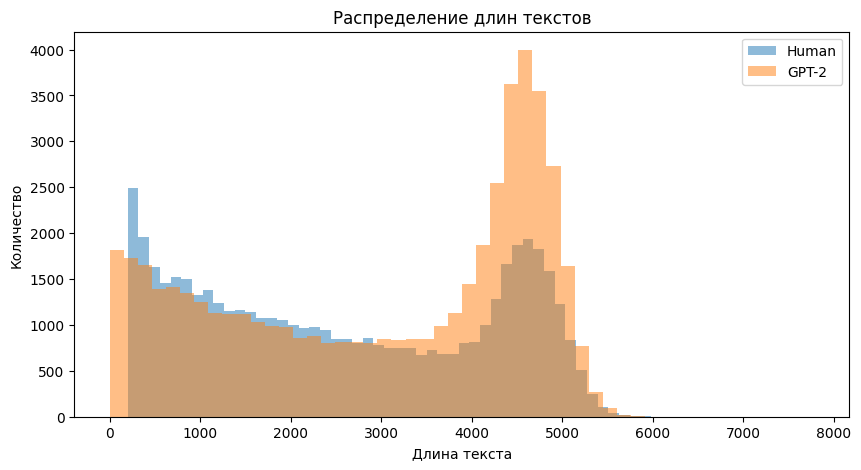


Пример человеческого текста:
These girlfriends deserves a special mention for going that extra mile, hopefully doesn't set too many guys off on the path towards outrageous demands.

1. She knows the severity of man-flu

2. All fun and games is all good

3. A voucher that says 'I love you'

4. When arguments don't drag on forever.

5. Providing everything he needs.

6. Very understanding

7. As awesome a gesture as this is, we are worried about this man's cooking skills.

8. Nice cake

8. Fair bargaining

9. Excellent gift c...

Пример GPT-2 текста:
Video: Video: HOW SHUKK PINGES WORKING: He's the only one who can come up with a clever yet difficult combination or have he best be 'abstract filler'


Lola Kirke WatchESPN Juliet Huddy Carl Edwards Jordan Hankins Ty Pozzobon Death Tree Man NFL mock draft Altaba Obama Farewell Speech Pioneer Cabin tree Raymond James Stadium Alabama Vs Clemson Clemson Tigers Rodeo Houston 2017

Browser not supported.

Please update to Chrome / Firefox.

Als

In [6]:
# Визуализация данных
import matplotlib.pyplot as plt

# Распределение длин текстов
df['text_length'] = df['text'].str.len()
plt.figure(figsize=(10, 5))
plt.hist(df[df['label']==0]['text_length'], bins=50, alpha=0.5, label='Human')
plt.hist(df[df['label']==1]['text_length'], bins=50, alpha=0.5, label='GPT-2')
plt.title('Распределение длин текстов')
plt.xlabel('Длина текста')
plt.ylabel('Количество')
plt.legend()
plt.show()

# Примеры текстов
print("\nПример человеческого текста:")
print(df[df['label']==0]['text'].iloc[0][:500] + "...")

print("\nПример GPT-2 текста:")
print(df[df['label']==1]['text'].iloc[0][:500] + "...")

In [7]:
from transformers import BertTokenizer
from torch.utils.data import Dataset

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts  # Список текстов
        self.labels = labels  # Список меток
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        """Возвращает общее количество примеров в датасете"""
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])

        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(label)
        }

# Пример использования:
dataset = TextDataset(
    texts=df["text"].values,
    labels=df["label"].values,
    tokenizer=tokenizer
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
text = "The cat sat on the mat."
encoding = tokenizer(
    text,
    max_length=10,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

print(encoding)

{'input_ids': tensor([[  101,  1996,  4937,  2938,  2006,  1996, 13523,  1012,   102,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])}


In [9]:
from torch.utils.data import DataLoader, random_split
from transformers import BertForSequenceClassification

# Разделение на train/val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Создание DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [10]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,  # 2 класса: human/gpt-2
    output_attentions=False,
    output_hidden_states=False
)

# Перенос модели на GPU (если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [11]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW

epochs = 3
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [12]:
from tqdm import tqdm
import numpy as np

def train():
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_loader)
    return avg_loss

In [13]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate():
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1).flatten()
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return accuracy, f1


Epoch 1/3


100%|██████████| 5000/5000 [1:23:21<00:00,  1.00s/it]


Train Loss: 0.1595
Val Accuracy: 0.9685 | Val F1: 0.9681

Epoch 2/3


100%|██████████| 5000/5000 [1:23:25<00:00,  1.00s/it]


Train Loss: 0.0639
Val Accuracy: 0.9372 | Val F1: 0.9336

Epoch 3/3


100%|██████████| 5000/5000 [1:23:30<00:00,  1.00s/it]


Train Loss: 0.0200
Val Accuracy: 0.9572 | Val F1: 0.9557


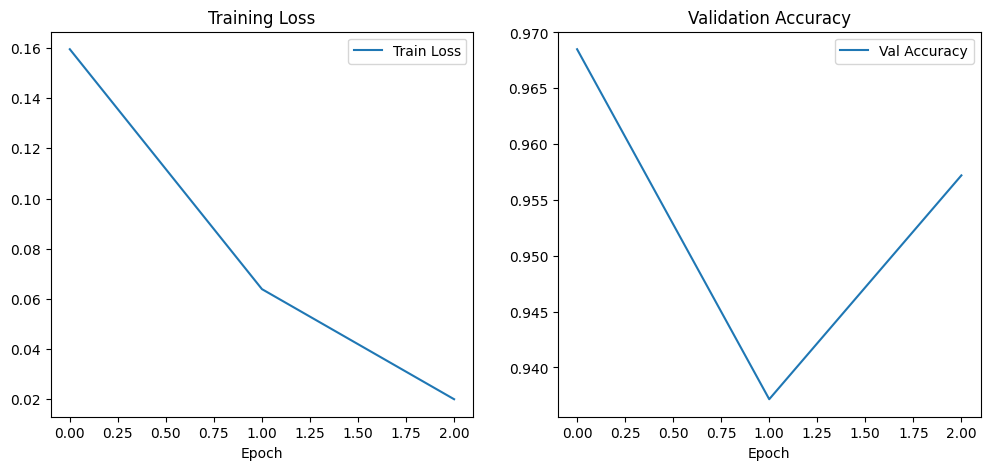

In [14]:
import matplotlib.pyplot as plt
# Добавьте сбор метрик во время обучения:
train_losses = []
val_accuracies = []
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    train_loss = train()
    val_accuracy, val_f1 = evaluate()

    print(f"Train Loss: {train_loss:.4f}")
    print(f"Val Accuracy: {val_accuracy:.4f} | Val F1: {val_f1:.4f}")
    train_losses.append(train_loss)
    val_accuracies.append(val_accuracy)

# Построение графиков
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [15]:
model.save_pretrained("gpt2_detector")
tokenizer.save_pretrained("gpt2_detector")

('gpt2_detector/tokenizer_config.json',
 'gpt2_detector/special_tokens_map.json',
 'gpt2_detector/vocab.txt',
 'gpt2_detector/added_tokens.json')

In [16]:
def predict(text):
    inputs = tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=512,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    probs = torch.softmax(outputs.logits, dim=1)
    return probs[0][1].item()  # Вероятность, что текст от GPT-2

# Пример использования
text = "The quantum theory of gravity remains unsolved..."
print(f"Вероятность генерации GPT-2: {predict(text):.2%}")

Вероятность генерации GPT-2: 99.99%


возможные улучшения:

Добавление шумов в реальные тексты (опечатки, синонимы).
Комбинация BERT + статистические методы (перплексия).
